## Project

In this project, our aim is to building a model for predicting churn. Churn is the percentage of customers that stopped using your company's product or service during a certain time frame. Thus, in the given dataset, our label will be `Churn` column.

## Steps
- Read the `churn.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification).
- Train and evaluate Logistic Regression, Decision Trees and one other appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

<h2>Name:</h2>

##  Isah Abdul-Azeez

# Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

C:\Users\saleh\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Read csv
data = pd.read_csv("churn.csv")
data.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [3]:
# Describe our data for each feature and use .info() for get information about our dataset
data.info()
# Analys missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [4]:
data.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [5]:
data.isna().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

# Exploratory Data Analysis

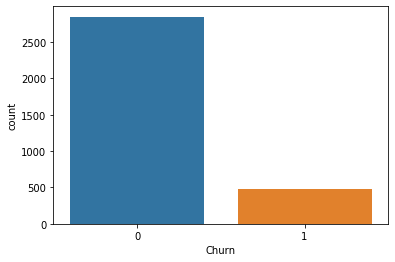

In [6]:
# Our label Distribution (countplot)

sns.countplot(x='Churn', data=data)

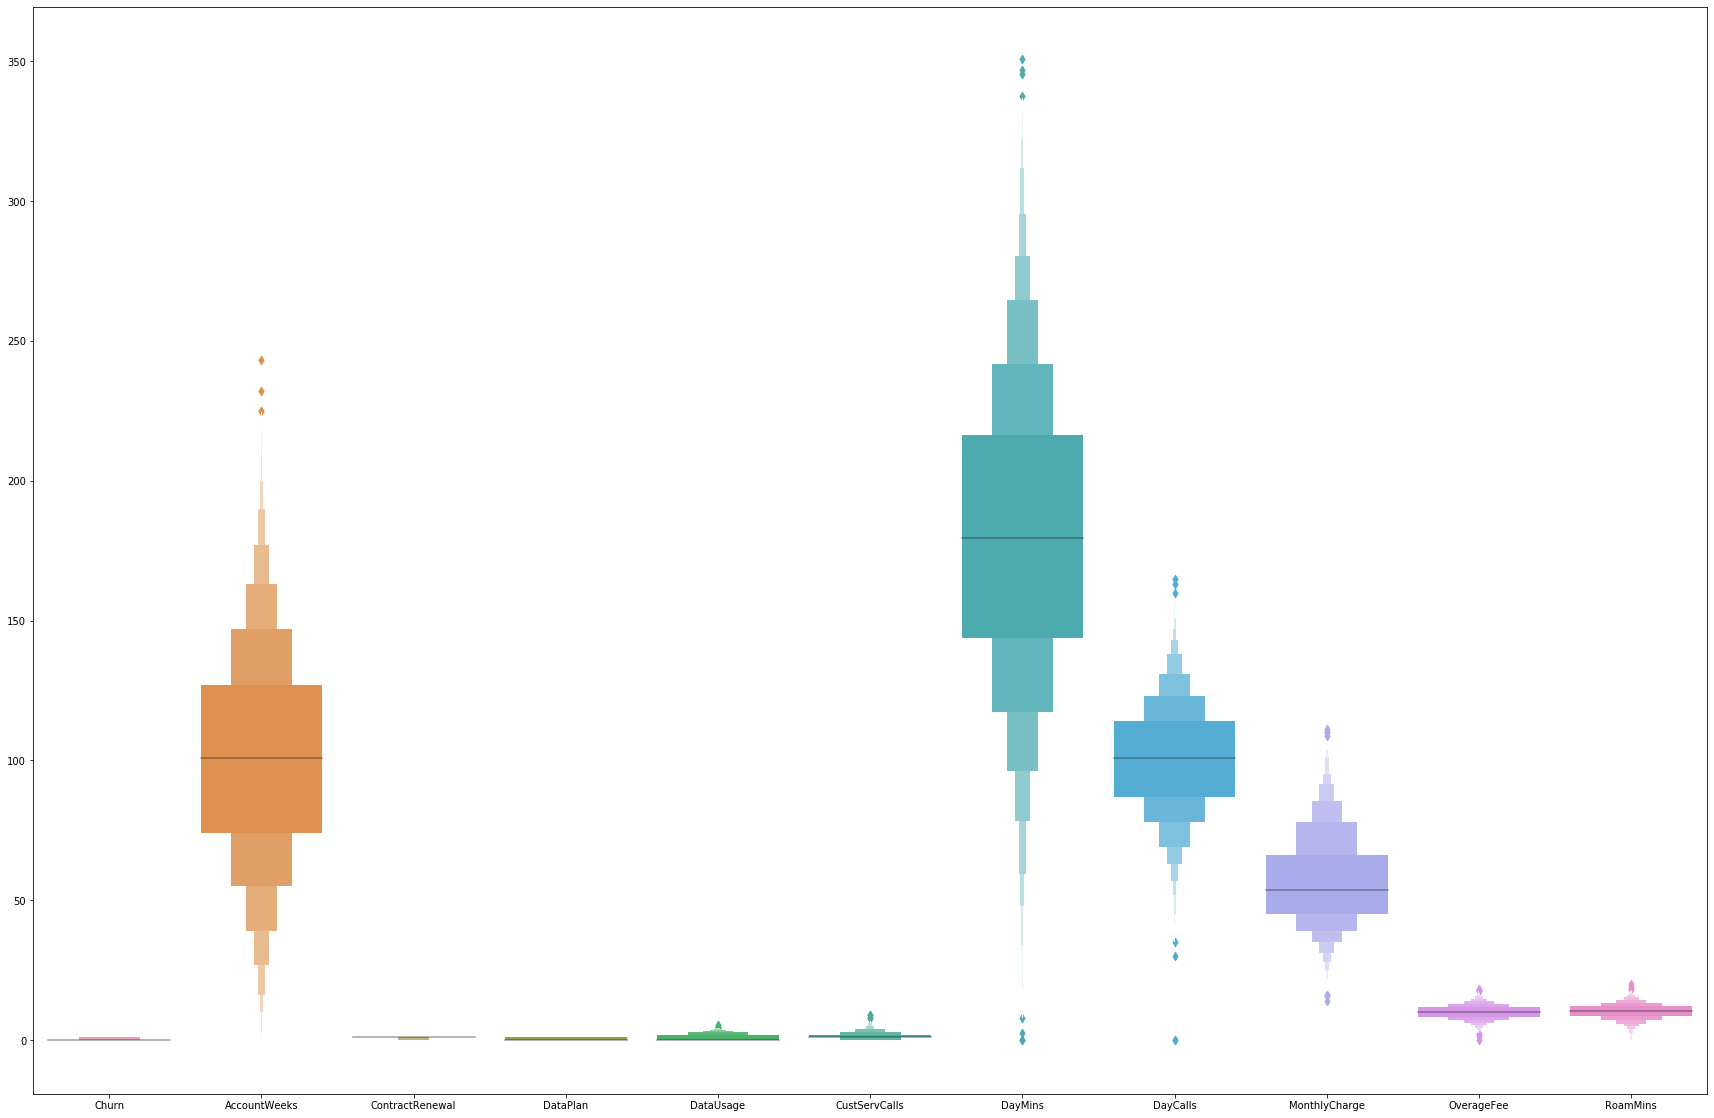

In [7]:
plt.figure(figsize=(30, 20))
sns.boxenplot(data=data)

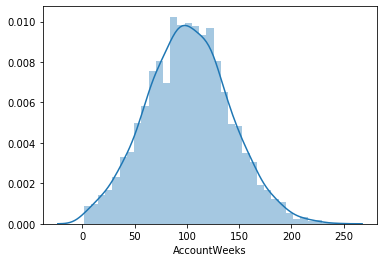

In [8]:
sns.distplot(data['AccountWeeks'])

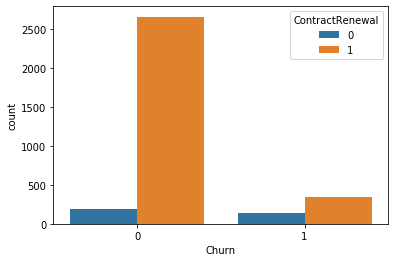

In [9]:
sns.countplot(data=data, x='Churn', hue='ContractRenewal')

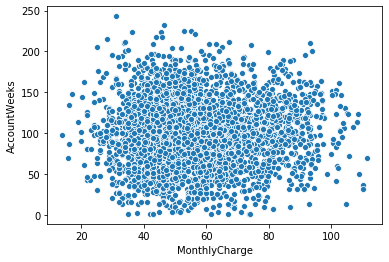

In [10]:
sns.scatterplot(y='AccountWeeks', x='MonthlyCharge', data=data)


# Preprocessing

- Are there any duplicated values?
- Do we need to do feature scaling?
- Do we need to generate new features?
- Split Train and Test dataset. (0.7/0.3)

In [11]:
# Check for duplicates

data.duplicated(subset=None).sum() # There are no duplicates

0

# ML Application

- Define models.
- Fit models.
- Evaluate models for both train and test dataset.
- Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
- Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

### Proceedure:

###### Initially, I trained and predicted on three models: Random forest, XGBOOST, Catboost classifiers (using deafult parameters) but did not achieve an auc_score greater than 93%

###### In the secon part of this section, I did some preprocessing by removing o0utliers and scaling the features, this gave me a training and test auc_score of 100% (with default parameters)

### RandomForestClassifier

In [18]:
data.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

In [19]:
features = data[['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins']]
             
labels = data['Churn']

In [20]:
from sklearn.model_selection import train_test_split, cross_validate

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

In [15]:
from sklearn.model_selection import cross_validate, train_test_split


In [21]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

In [22]:
cv = cross_validate(rfc,X_train,y_train,cv = 3, return_estimator=True)

print("Mean training accuracy: {}".format(np.mean(cv['test_score'])))
print("Test accuracy: {}".format(cv["estimator"][0].score(X_test,y_test)))

Mean training accuracy: 0.9305614832607122
Test accuracy: 0.932


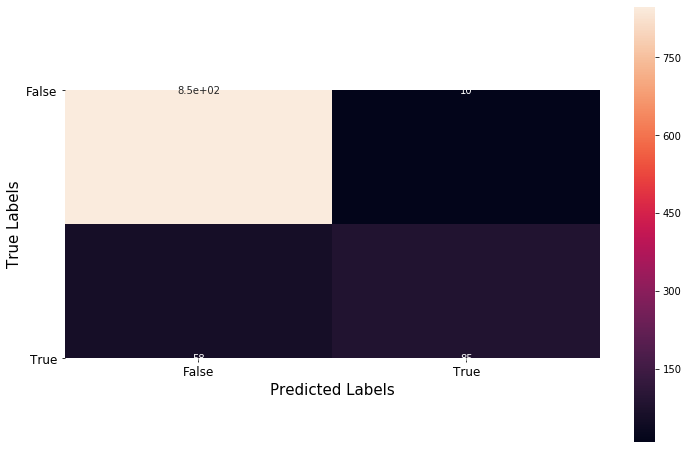

In [23]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
pred = cv["estimator"][0].predict(X_test)

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=True)
ax.xaxis.set_ticklabels(["False","True"], fontsize = 12)
ax.yaxis.set_ticklabels(["False","True"], fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [27]:
# fitting on the entire dataset
model = rfc.fit(X_train,y_train)



In [28]:
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

y_pred = model.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))
print("F1 Score:",f1_score(y_test,y_pred))

Accuracy: 0.929
Precision: 0.8829787234042553
Recall: 0.5804195804195804
F1 Score: 0.7004219409282701


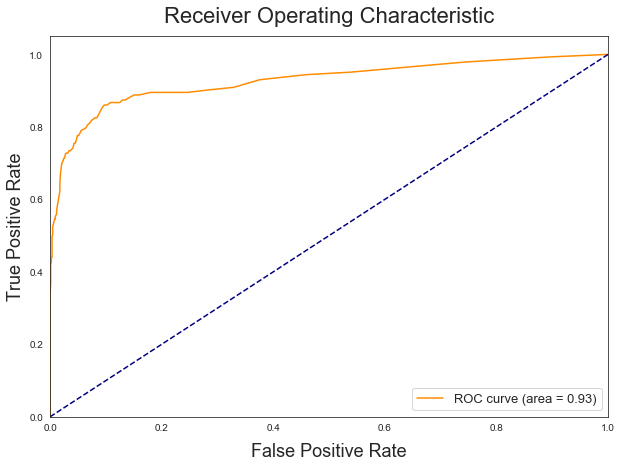

In [29]:
from sklearn.metrics import roc_curve, auc

y_pred_prop = model.predict_proba(X_test)[:,1]

fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_prop)
roc_auc_log = auc(fpr_log, tpr_log)

sns.set_style("white")
plt.figure(figsize=(10, 7))
plt.plot(fpr_log, tpr_log, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc_log)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=18,labelpad =10)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Receiver Operating Characteristic',fontsize=22).set_position([.5, 1.02])
plt.legend(loc="lower right",fontsize=13)
plt.show()

### XGBOOST

In [30]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

In [31]:
cv1 = cross_validate(xgb,X_train,y_train,cv = 3, return_estimator=True)

print("Mean training accuracy: {}".format(np.mean(cv1['test_score'])))
print("Test accuracy: {}".format(cv1["estimator"][0].score(X_test,y_test)))

Mean training accuracy: 0.9224215033983673
Test accuracy: 0.923


In [32]:
# fitting on the entire dataset
model1 = xgb.fit(X_train,y_train)

model1.predict(X_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [33]:
y_pred1 = model1.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))
print("F1 Score:",f1_score(y_test,y_pred))

Accuracy: 0.929
Precision: 0.8829787234042553
Recall: 0.5804195804195804
F1 Score: 0.7004219409282701


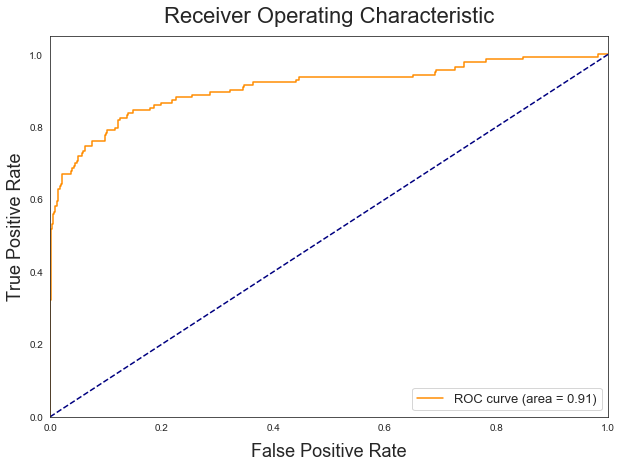

In [34]:
from sklearn.metrics import roc_curve, auc

y_pred_prop = model1.predict_proba(X_test)[:,1]

fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_prop)
roc_auc_log = auc(fpr_log, tpr_log)

sns.set_style("white")
plt.figure(figsize=(10, 7))
plt.plot(fpr_log, tpr_log, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc_log)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=18,labelpad =10)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Receiver Operating Characteristic',fontsize=22).set_position([.5, 1.02])
plt.legend(loc="lower right",fontsize=13)
plt.show()

### CatBoost

In [35]:
from catboost import CatBoostClassifier

cb = CatBoostClassifier()

In [36]:
cv2 = cross_validate(cb, X_train,y_train,cv = 3, n_jobs=-1, return_estimator=True)

print("Mean training accuracy: {}".format(np.mean(cv2['test_score'])))
print("Test accuracy: {}".format(cv2["estimator"][0].score(X_test,y_test)))

Mean training accuracy: 0.9322763821478475
Test accuracy: 0.937


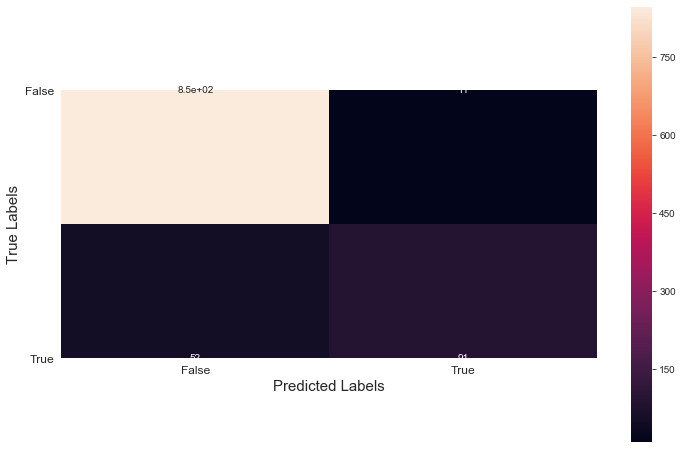

In [37]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
pred = cv2["estimator"][0].predict(X_test)

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=True)
ax.xaxis.set_ticklabels(["False","True"], fontsize = 12)
ax.yaxis.set_ticklabels(["False","True"], fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [38]:
#model2 = cv2['estimator'][0]
#model2.predict_proba(X_test)

model2 = cb.fit(X_train,y_train)

model2.predict(X_test)

Learning rate set to 0.014792
0:	learn: 0.6785657	total: 84.5ms	remaining: 1m 24s
1:	learn: 0.6633061	total: 101ms	remaining: 50.4s
2:	learn: 0.6497155	total: 120ms	remaining: 39.9s
3:	learn: 0.6341767	total: 149ms	remaining: 37.1s
4:	learn: 0.6191656	total: 175ms	remaining: 34.9s
5:	learn: 0.6068670	total: 199ms	remaining: 33s
6:	learn: 0.5915477	total: 239ms	remaining: 33.9s
7:	learn: 0.5822448	total: 258ms	remaining: 32s
8:	learn: 0.5700050	total: 287ms	remaining: 31.6s
9:	learn: 0.5589835	total: 305ms	remaining: 30.2s
10:	learn: 0.5450401	total: 341ms	remaining: 30.6s
11:	learn: 0.5333166	total: 360ms	remaining: 29.7s
12:	learn: 0.5233989	total: 379ms	remaining: 28.7s
13:	learn: 0.5145123	total: 394ms	remaining: 27.8s
14:	learn: 0.5047278	total: 410ms	remaining: 27s
15:	learn: 0.4973208	total: 425ms	remaining: 26.2s
16:	learn: 0.4875387	total: 440ms	remaining: 25.4s
17:	learn: 0.4765429	total: 454ms	remaining: 24.8s
18:	learn: 0.4662502	total: 469ms	remaining: 24.2s
19:	learn: 0.45

163:	learn: 0.1902434	total: 3.06s	remaining: 15.6s
164:	learn: 0.1899247	total: 3.08s	remaining: 15.6s
165:	learn: 0.1896236	total: 3.1s	remaining: 15.6s
166:	learn: 0.1893473	total: 3.11s	remaining: 15.5s
167:	learn: 0.1890276	total: 3.13s	remaining: 15.5s
168:	learn: 0.1887522	total: 3.14s	remaining: 15.5s
169:	learn: 0.1884639	total: 3.16s	remaining: 15.4s
170:	learn: 0.1881518	total: 3.17s	remaining: 15.4s
171:	learn: 0.1877169	total: 3.19s	remaining: 15.3s
172:	learn: 0.1873983	total: 3.2s	remaining: 15.3s
173:	learn: 0.1872410	total: 3.22s	remaining: 15.3s
174:	learn: 0.1868704	total: 3.23s	remaining: 15.2s
175:	learn: 0.1866149	total: 3.25s	remaining: 15.2s
176:	learn: 0.1864159	total: 3.27s	remaining: 15.2s
177:	learn: 0.1860779	total: 3.29s	remaining: 15.2s
178:	learn: 0.1857060	total: 3.3s	remaining: 15.2s
179:	learn: 0.1853690	total: 3.32s	remaining: 15.1s
180:	learn: 0.1851554	total: 3.33s	remaining: 15.1s
181:	learn: 0.1848596	total: 3.34s	remaining: 15s
182:	learn: 0.184

328:	learn: 0.1586777	total: 5.87s	remaining: 12s
329:	learn: 0.1585546	total: 5.89s	remaining: 12s
330:	learn: 0.1584987	total: 5.9s	remaining: 11.9s
331:	learn: 0.1583044	total: 5.92s	remaining: 11.9s
332:	learn: 0.1581642	total: 5.94s	remaining: 11.9s
333:	learn: 0.1580219	total: 5.95s	remaining: 11.9s
334:	learn: 0.1579640	total: 5.97s	remaining: 11.8s
335:	learn: 0.1577894	total: 5.98s	remaining: 11.8s
336:	learn: 0.1577840	total: 5.99s	remaining: 11.8s
337:	learn: 0.1577161	total: 6.01s	remaining: 11.8s
338:	learn: 0.1576195	total: 6.02s	remaining: 11.7s
339:	learn: 0.1575130	total: 6.04s	remaining: 11.7s
340:	learn: 0.1574160	total: 6.05s	remaining: 11.7s
341:	learn: 0.1573639	total: 6.07s	remaining: 11.7s
342:	learn: 0.1572055	total: 6.09s	remaining: 11.7s
343:	learn: 0.1570959	total: 6.1s	remaining: 11.6s
344:	learn: 0.1570128	total: 6.12s	remaining: 11.6s
345:	learn: 0.1568979	total: 6.14s	remaining: 11.6s
346:	learn: 0.1567357	total: 6.25s	remaining: 11.8s
347:	learn: 0.1566

490:	learn: 0.1406455	total: 8.98s	remaining: 9.31s
491:	learn: 0.1405634	total: 9s	remaining: 9.29s
492:	learn: 0.1405217	total: 9.01s	remaining: 9.27s
493:	learn: 0.1404183	total: 9.03s	remaining: 9.25s
494:	learn: 0.1402149	total: 9.05s	remaining: 9.23s
495:	learn: 0.1401018	total: 9.06s	remaining: 9.21s
496:	learn: 0.1400267	total: 9.08s	remaining: 9.19s
497:	learn: 0.1399509	total: 9.09s	remaining: 9.17s
498:	learn: 0.1398226	total: 9.11s	remaining: 9.15s
499:	learn: 0.1397093	total: 9.12s	remaining: 9.12s
500:	learn: 0.1396396	total: 9.14s	remaining: 9.1s
501:	learn: 0.1394992	total: 9.15s	remaining: 9.08s
502:	learn: 0.1394349	total: 9.17s	remaining: 9.06s
503:	learn: 0.1393737	total: 9.19s	remaining: 9.04s
504:	learn: 0.1393212	total: 9.2s	remaining: 9.02s
505:	learn: 0.1392039	total: 9.21s	remaining: 9s
506:	learn: 0.1391205	total: 9.23s	remaining: 8.97s
507:	learn: 0.1390122	total: 9.25s	remaining: 8.95s
508:	learn: 0.1388883	total: 9.26s	remaining: 8.93s
509:	learn: 0.138724

650:	learn: 0.1258009	total: 11.7s	remaining: 6.28s
651:	learn: 0.1257152	total: 11.7s	remaining: 6.26s
652:	learn: 0.1256451	total: 11.7s	remaining: 6.24s
653:	learn: 0.1255595	total: 11.8s	remaining: 6.22s
654:	learn: 0.1253365	total: 11.8s	remaining: 6.2s
655:	learn: 0.1252564	total: 11.8s	remaining: 6.18s
656:	learn: 0.1250509	total: 11.8s	remaining: 6.16s
657:	learn: 0.1250030	total: 11.8s	remaining: 6.14s
658:	learn: 0.1249112	total: 11.8s	remaining: 6.12s
659:	learn: 0.1248791	total: 11.8s	remaining: 6.1s
660:	learn: 0.1247811	total: 11.9s	remaining: 6.08s
661:	learn: 0.1246987	total: 11.9s	remaining: 6.07s
662:	learn: 0.1245695	total: 11.9s	remaining: 6.05s
663:	learn: 0.1244439	total: 11.9s	remaining: 6.03s
664:	learn: 0.1243004	total: 11.9s	remaining: 6.01s
665:	learn: 0.1242395	total: 11.9s	remaining: 5.99s
666:	learn: 0.1240762	total: 12s	remaining: 5.97s
667:	learn: 0.1238570	total: 12s	remaining: 5.95s
668:	learn: 0.1236879	total: 12s	remaining: 5.93s
669:	learn: 0.123568

810:	learn: 0.1122946	total: 14.5s	remaining: 3.38s
811:	learn: 0.1122684	total: 14.6s	remaining: 3.37s
812:	learn: 0.1121640	total: 14.6s	remaining: 3.35s
813:	learn: 0.1120895	total: 14.6s	remaining: 3.33s
814:	learn: 0.1119527	total: 14.6s	remaining: 3.32s
815:	learn: 0.1119483	total: 14.6s	remaining: 3.3s
816:	learn: 0.1118943	total: 14.7s	remaining: 3.29s
817:	learn: 0.1117791	total: 14.7s	remaining: 3.27s
818:	learn: 0.1117155	total: 14.7s	remaining: 3.25s
819:	learn: 0.1116599	total: 14.7s	remaining: 3.23s
820:	learn: 0.1116012	total: 14.7s	remaining: 3.21s
821:	learn: 0.1115824	total: 14.8s	remaining: 3.19s
822:	learn: 0.1115354	total: 14.8s	remaining: 3.18s
823:	learn: 0.1113879	total: 14.8s	remaining: 3.16s
824:	learn: 0.1113766	total: 14.8s	remaining: 3.14s
825:	learn: 0.1113073	total: 14.8s	remaining: 3.12s
826:	learn: 0.1112205	total: 14.8s	remaining: 3.1s
827:	learn: 0.1111824	total: 14.8s	remaining: 3.08s
828:	learn: 0.1110421	total: 14.9s	remaining: 3.07s
829:	learn: 0.

980:	learn: 0.1000707	total: 17.5s	remaining: 339ms
981:	learn: 0.0999946	total: 17.5s	remaining: 321ms
982:	learn: 0.0999430	total: 17.5s	remaining: 303ms
983:	learn: 0.0998305	total: 17.5s	remaining: 285ms
984:	learn: 0.0998132	total: 17.6s	remaining: 267ms
985:	learn: 0.0997696	total: 17.6s	remaining: 249ms
986:	learn: 0.0997377	total: 17.6s	remaining: 232ms
987:	learn: 0.0997287	total: 17.6s	remaining: 214ms
988:	learn: 0.0997121	total: 17.6s	remaining: 196ms
989:	learn: 0.0996190	total: 17.6s	remaining: 178ms
990:	learn: 0.0995049	total: 17.6s	remaining: 160ms
991:	learn: 0.0994555	total: 17.7s	remaining: 142ms
992:	learn: 0.0993699	total: 17.7s	remaining: 125ms
993:	learn: 0.0993119	total: 17.7s	remaining: 107ms
994:	learn: 0.0991789	total: 17.7s	remaining: 89ms
995:	learn: 0.0991632	total: 17.7s	remaining: 71.1ms
996:	learn: 0.0991338	total: 17.7s	remaining: 53.3ms
997:	learn: 0.0990654	total: 17.7s	remaining: 35.6ms
998:	learn: 0.0990442	total: 17.8s	remaining: 17.8ms
999:	lear

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [39]:
y_pred2 = model2.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))
print("F1 Score:",f1_score(y_test,y_pred))

Accuracy: 0.929
Precision: 0.8829787234042553
Recall: 0.5804195804195804
F1 Score: 0.7004219409282701


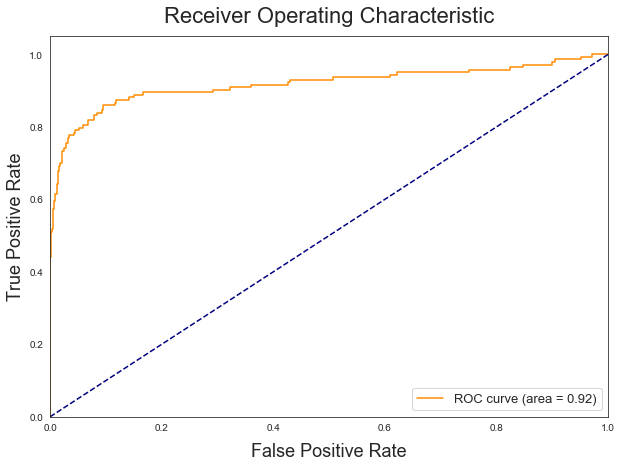

In [40]:
from sklearn.metrics import roc_curve, auc

y_pred_prop = model2.predict_proba(X_test)[:,1]

fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_prop)
roc_auc_log = auc(fpr_log, tpr_log)

sns.set_style("white")
plt.figure(figsize=(10, 7))
plt.plot(fpr_log, tpr_log, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc_log)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=18,labelpad =10)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Receiver Operating Characteristic',fontsize=22).set_position([.5, 1.02])
plt.legend(loc="lower right",fontsize=13)
plt.show()

###### Results obtained without correcting outliers or doing feature scaling:

- The best performing model  with default parameters is Random Forest Classifier.
- The model can be improved with hyper parameter tuning using either GridSearch or Optuner

### Eliminating outliers and Feature scaling

### Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

In [42]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data))
z

array([[0.41167182, 0.67648946, 0.32758048, ..., 1.99072703, 0.0715836 ,
        0.08500823],
       [0.41167182, 0.14906505, 0.32758048, ..., 1.56451025, 0.10708191,
        1.24048169],
       [0.41167182, 0.9025285 , 0.32758048, ..., 0.26213309, 1.57434567,
        0.70312091],
       ...,
       [0.41167182, 1.83505538, 0.32758048, ..., 0.01858065, 1.73094204,
        1.3837779 ],
       [0.41167182, 2.08295458, 3.05268496, ..., 0.38390932, 0.81704825,
        1.87621082],
       [0.41167182, 0.67974475, 0.32758048, ..., 2.66049626, 1.28129669,
        1.24048169]])

In [43]:
outliers = list(set(np.where(z > 3)[0]))

len(outliers)

414

In [44]:
new_df = data.drop(outliers,axis = 0).reset_index(drop = False)
display(new_df)

y_new = new_df["Churn"]
len(y_new)

,index,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,6,0,121,1,1,2.03,3,218.2,88,87.3,17.43,7.5
4,8,0,117,1,0,0.19,1,184.5,97,63.9,17.58,8.7
...,...,...,...,...,...,...,...,...,...,...,...,...
2914,3327,0,79,1,0,0.00,2,134.7,98,40.0,9.49,11.8
2915,3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
2916,3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
2917,3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1


2919

In [45]:
X_new = new_df.drop('index', axis = 1)

from sklearn.preprocessing import StandardScaler, MinMaxScaler
X_scaled = StandardScaler().fit_transform(X_new)
X_scaled

array([[-0.35150616,  0.69196206,  0.        , ...,  2.05929645,
        -0.068431  , -0.0941079 ],
       [-0.35150616,  0.1624696 ,  0.        , ...,  1.62161451,
        -0.10450144,  1.29308134],
       [-0.35150616,  0.9188874 ,  0.        , ..., -0.25416527,
        -1.59541298,  0.73070732],
       ...,
       [-0.35150616, -0.82087355,  0.        , ...,  0.0209491 ,
        -0.95015288, -0.2440743 ],
       [-0.35150616, -1.82943062,  0.        , ..., -0.0040613 ,
         1.76314581,  1.44304774],
       [-0.35150616, -0.66958999,  0.        , ...,  2.74708237,
         1.30625356,  1.29308134]])

In [46]:
x_tr,x_ts, y_tr, y_ts = train_test_split(X_scaled, y_new, test_size = 0.3, random_state=42)

In [47]:
cv = cross_validate(rfc,x_tr,y_tr,cv = 3, return_estimator=True)

print("Mean training accuracy: {}".format(np.mean(cv['test_score'])))
print("Test accuracy: {}".format(cv["estimator"][0].score(x_ts,y_ts)))

Mean training accuracy: 1.0
Test accuracy: 1.0


In [48]:
mo = rfc.fit(x_tr,y_tr)


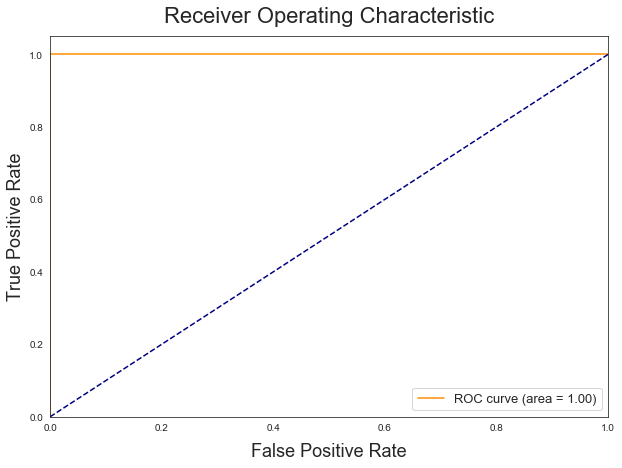

In [49]:
from sklearn.metrics import roc_curve, auc

y_pred_prop = mo.predict_proba(x_ts)[:,1]

fpr_log, tpr_log, _ = roc_curve(y_ts, y_pred_prop)
roc_auc_log = auc(fpr_log, tpr_log)

sns.set_style("white")
plt.figure(figsize=(10, 7))
plt.plot(fpr_log, tpr_log, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc_log)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=18,labelpad =10)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Receiver Operating Characteristic',fontsize=22).set_position([.5, 1.02])
plt.legend(loc="lower right",fontsize=13)
plt.show()

# Evaluation

- Select the best performing model and write your comments about why choose this model.
- Analyse results and make comment about how you can improve model.

### Final Resolution (Answers)

- Yes, we require feature scaling to improve our model's performance
- No, we do not need to generate new features
- I also improved my model by eliminating outliers and carrying out feature scaling.
- Other thechniques involve doing hyperparameter tunning using Grisearch or Optuner

## Training 